### Traces creation for sim

In [26]:
df = pd.read_csv('C:\\Users\\Alfre\\Escritorio\\vs_code\\cripto\\Prosumer_ABC.csv', encoding='unicode_escape', sep =';')

import json
from datetime import datetime, timedelta
import pandas as pd

# Generate traces for each column
traces = []
trace_id_counter = 1

for column in df.columns[5:]:  # Assuming the columns start from index 5
    trace = {
        "trace_id": str(trace_id_counter),
        "timestamp": "",
        "C(0)/P(1)": "0",
        "value": None
    }

    # Extract timestamp from column header
    interval = int(column)
    hours = (interval - 1) // 4
    minutes = (interval - 1) % 4 * 15

# Set timestamp using values from the dataframe
    day = int(df['Dia'][0])  # Assuming you want to get the value from the first row in the dataframe
    month = int(df['Mes '][0])
    year = int(df['AÃ±o'][0])
    timestamp = datetime(year=year, month=month, day=day, hour=hours, minute=minutes)

    # Set trace values
    trace['timestamp'] = timestamp.strftime('%Y-%m-%dT%H:%M:%SZ')
    trace['value'] = df[column][0]  # Assuming you want to get the value from the first row in the dataframe

    traces.append(trace)
    trace_id_counter += 1

# Print the traces
for trace in traces:
    trace_json = json.dumps(trace)
    print(trace_json)

{"trace_id": "1", "timestamp": "2013-11-02T00:00:00Z", "C(0)/P(1)": "0", "value": 58.0}
{"trace_id": "2", "timestamp": "2013-11-02T00:15:00Z", "C(0)/P(1)": "0", "value": 75.0}
{"trace_id": "3", "timestamp": "2013-11-02T00:30:00Z", "C(0)/P(1)": "0", "value": 65.0}
{"trace_id": "4", "timestamp": "2013-11-02T00:45:00Z", "C(0)/P(1)": "0", "value": 0.08}
{"trace_id": "5", "timestamp": "2013-11-02T01:00:00Z", "C(0)/P(1)": "0", "value": 67.0}
{"trace_id": "6", "timestamp": "2013-11-02T01:15:00Z", "C(0)/P(1)": "0", "value": 69.0}
{"trace_id": "7", "timestamp": "2013-11-02T01:30:00Z", "C(0)/P(1)": "0", "value": 0.07}
{"trace_id": "8", "timestamp": "2013-11-02T01:45:00Z", "C(0)/P(1)": "0", "value": 73.0}
{"trace_id": "9", "timestamp": "2013-11-02T02:00:00Z", "C(0)/P(1)": "0", "value": 68.0}
{"trace_id": "10", "timestamp": "2013-11-02T02:15:00Z", "C(0)/P(1)": "0", "value": 0.06}
{"trace_id": "11", "timestamp": "2013-11-02T02:30:00Z", "C(0)/P(1)": "0", "value": 77.0}
{"trace_id": "12", "timestamp"

Agregar cual audtiro lo envió

### Publisher MQtt

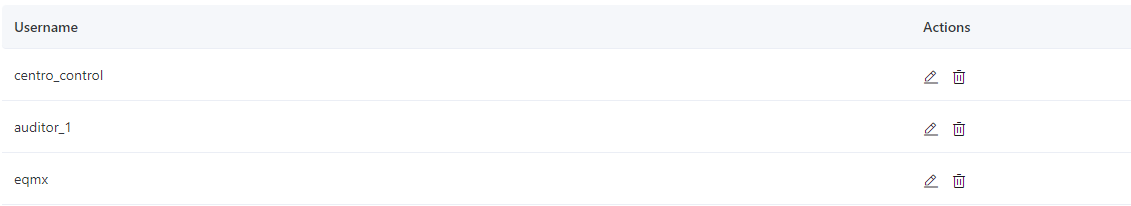

In [1]:
import paho.mqtt.client as mqtt
import random
import json
import time
import ssl


broker = 'cf1ce048.ala.us-east-1.emqxsl.com'
port = 8883
publish_topic = "cripto_test"
subscribe_topic = "cripto_test"

client_id = f'python-mqtt-{random.randint(0, 100)}'

def connect_mqtt() -> mqtt.Client:
    def on_connect(client, userdata, flags, rc):
        if rc == 0:
            print("Connected to MQTT Broker!")
        else:
            print("Failed to connect, return code", rc)

    client = mqtt.Client(client_id)
    client.on_connect = on_connect

    client.username_pw_set("auditor_1", "poner_una_contraseña_muy_segura1")
    # Enable SSL/TLS
    client.tls_set(ca_certs="C:\\Users\\Alfre\\Downloads\\emqxsl-ca.crt", 
                tls_version=ssl.PROTOCOL_TLSv1_2)
    #client.tls_insecure_set(True)  # Accept self-signed certificates without verification


    # Set MQTT broker address and port
    client.connect(broker, port)
    return client

def publish(client: mqtt.Client, data):
    msg_count = 0
    while True:
        time.sleep(5)
        msg = json.dumps(data[msg_count])
        result = client.publish(publish_topic, msg)
        status = result[0]
        if status == mqtt.MQTT_ERR_SUCCESS:
            print(f"Published message {msg_count + 1} of {len(data)}")
        else:
            print(f"Failed to publish message {msg_count + 1}")
        msg_count += 1
        if msg_count >= len(data):
            break

# Example traces data
example_traces = [
    {"trace_id": "011", "timestamp": "2013-11-02T00:00:00Z", "C(0)/P(1)": "0", "value": 58.0},
    {"trace_id": "012", "timestamp": "2013-11-02T00:15:00Z", "C(0)/P(1)": "0", "value": 75.0},
    {"trace_id": "013", "timestamp": "2013-11-02T00:30:00Z", "C(0)/P(1)": "0", "value": 65.0},
    {"trace_id": "014", "timestamp": "2013-11-02T00:45:00Z", "C(0)/P(1)": "0", "value": 0.08},
    {"trace_id": "015", "timestamp": "2013-11-02T01:00:00Z", "C(0)/P(1)": "0", "value": 67.0},
    {"trace_id": "016", "timestamp": "2013-11-02T01:15:00Z", "C(0)/P(1)": "0", "value": 69.0},
    {"trace_id": "017", "timestamp": "2013-11-02T01:30:00Z", "C(0)/P(1)": "0", "value": 0.07},
    {"trace_id": "018", "timestamp": "2013-11-02T01:45:00Z", "C(0)/P(1)": "0", "value": 73.0},
    {"trace_id": "019", "timestamp": "2013-11-02T02:00:00Z", "C(0)/P(1)": "0", "value": 68.0},
    {"trace_id": "0110", "timestamp": "2013-11-02T02:15:00Z", "C(0)/P(1)": "0", "value": 0.06}
]

In [2]:
#recordemos que tenemos que encriptar las trazas para evitar que puedan ser vulneradas por el broker

from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding
import os


# Generar una clave aleatoria
key = b'0123456789ABCDEF0123456789ABCDEF'

# Generar un IV único
def generate_iv():
    iv_length = 16  # Longitud del IV en bytes (para AES, se recomienda 16 bytes)
    iv = os.urandom(iv_length)
    return iv

# Ejemplo de uso
iv = generate_iv()
#print("IV único:", iv.hex())

# Datos a cifrar
data = b'"trace_id": "011", "timestamp": "2013-11-02T00:00:00Z", "C(0)/P(1)": "0", "value": 58.0'

# Pad the data
padder = padding.PKCS7(128).padder()
padded_data = padder.update(data) + padder.finalize()

# Crear un objeto Cipher
cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend())

# Cifrar los datos
encryptor = cipher.encryptor()
ciphertext = encryptor.update(padded_data) + encryptor.finalize()


In [44]:
# Descifrar los datos
#decryptor = cipher.decryptor()
#decrypted_data = decryptor.update(ciphertext) + decryptor.finalize()

# Despad the data
#unpadder = padding.PKCS7(128).unpadder()
#unpadded_data = unpadder.update(decrypted_data) + unpadder.finalize()

#print("Datos originales:", data)
#print("Datos descifrados:", unpadded_data)

In [3]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
import os

# Generate a unique IV for each trace
def generate_iv():
    iv_length = 16  # IV length in bytes (recommended 16 bytes for AES)
    iv = os.urandom(iv_length)
    return iv

# Encrypt data using AES-CBC with a unique IV for each trace
def encrypt_data(key, iv, data):
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))
    encryptor = cipher.encryptor()

    # Pad the data
    padder = padding.PKCS7(128).padder()
    padded_data = padder.update(data) + padder.finalize()

    # Encrypt the padded data
    ciphertext = encryptor.update(padded_data) + encryptor.finalize()
    return ciphertext

# Example usage
key = b'0123456789ABCDEF0123456789ABCDEF'

# Original traces
traces = [
    b'"trace_id": "011", "timestamp": "2013-11-02T00:00:00Z", "C(0)/P(1)": "0", "value": 58.0',
    b'"trace_id": "012", "timestamp": "2013-11-02T00:15:00Z", "C(0)/P(1)": "0", "value": 75.0',
    b'"trace_id": "013", "timestamp": "2013-11-02T00:30:00Z", "C(0)/P(1)": "0", "value": 65.0',
    b'"trace_id": "014", "timestamp": "2013-11-02T00:45:00Z", "C(0)/P(1)": "0", "value": 0.08',
    b'"trace_id": "015", "timestamp": "2013-11-02T01:00:00Z", "C(0)/P(1)": "0", "value": 67.0',
    b'"trace_id": "016", "timestamp": "2013-11-02T01:15:00Z", "C(0)/P(1)": "0", "value": 69.0',
    b'"trace_id": "017", "timestamp": "2013-11-02T01:30:00Z", "C(0)/P(1)": "0", "value": 0.07',
    b'"trace_id": "018", "timestamp": "2013-11-02T01:45:00Z", "C(0)/P(1)": "0", "value": 73.0',
    b'"trace_id": "019", "timestamp": "2013-11-02T02:00:00Z", "C(0)/P(1)": "0", "value": 68.0',
    b'"trace_id": "0110", "timestamp": "2013-11-02T02:15:00Z", "C(0)/P(1)": "0", "value": 0.06'
]

# Encrypt and store each trace individually
encrypted_traces = []
for trace in traces:
    iv = generate_iv()
    ciphertext = encrypt_data(key, iv, trace)
    encrypted_trace = {
        'encrypted_data': ciphertext.decode('latin-1'),
        'iv': iv.decode('latin-1')
    }
    encrypted_traces.append(encrypted_trace)

# Example output
#for encrypted_trace in encrypted_traces:
#    print("Encrypted Data:", encrypted_trace['encrypted_data'])
#    print("IV:", encrypted_trace['iv'].hex())
#    print()


In [4]:
encrypted_traces

[{'encrypted_data': "*¾Óé\x02t1n\x1e)/³Ôè\x15¢coü¿£\x9fÎÙ%A\rÛõÕ\x80\x12\x06È|?Ï\x15j¤,qpóÂ\x896Ï÷\x99Ë\x144u\x80\x02¤\x92ýµ¹\\ÔÔÒ\\ÃÏ£'á/í95±\tå¢9+\x05y\x10ó\x8b<QÚËú\xa0\x7fê1S",
  'iv': '\x8e\x1f\x88!\x82òGa\x9e`\x1eV\x13\x11lv'},
 {'encrypted_data': "\n¸\x9d°[$¹\x81ú^\x00îÊ\x85\x16\x8b¡%#\x11÷¦\x97\xadÞê¨\x8fhÖ¯\x91«\x02çý\x0c'(\x1f·\x96Óx¿\x02=r»Â\x12Î6¸º\x10¡\x934\\o~à]ì\x9a®\x0e:/6\x9de¿÷\r\xadì\x01\xad\x07¤\x10\x02[\x10rrË\x02&I\x8boÑ\x9a",
  'iv': 'tßXx-:\x0eo\x7f©µd\tÅ$\x8f'},
 {'encrypted_data': 'A¥Ô×N\x03ùÅ}\x07Ö»\x08\x83Y¶ûÊ\x01 ´ÀHë\x12\x97\x9eZpL.æùPùE£6Eï\x9f\x87\x93#5\x1b\x93R\x16Ò\x9aÓ\x18\x07âî\x922\xad«\x86\x00½ð\x0bø,6\x90±@òû0÷qµ\r\\eZöý\x85Sûh\x87Wµ\x8eÄ`£¡µ',
  'iv': 'Þ÷ªfæbh\rèÌ-\x8bìn\x0e\n'},
 {'encrypted_data': '&E\\ðN.\x13©LÒ\x18`BV\x19u\x0b\x89\x80\x94?çÂÒ\x8cý%\x9düÀñ\x96\x1b\tFsæ^)WÉ(\x9bØXóÑÒ\x9e\x92±\x05õT1_\x9f\x92Åã?\x98\x1b\r \x87\x81\x85\x8aÀI\x7fBÃô%/«h\x19\x84ôíUêü4#\x00+\x91®\x9e¥ô\x9a',
  'iv': ']ë~Õ¤\x85#ZÄó%î®²\x9a\x83'},
 {'encrypted_data': 

In [5]:
ciphertext

b"~u\xa9h\x84\xfbo\xdb\xa10;C\x0f\xef\x9e\x99\xccA\x1e\x98\xf3\x07\x1a\xb2\x8cc\x91\xe8\xb3\x00\xf5\x9b`\xbd\xa5\x08\x92\x07\x01PD\xb7qM*JR\xf7UuZ2c\x9c\x95\xc2\x1c\xcf\x8d*\x11\r\xa7\x85\xefx\xe4\xd1j\xedU\x9d\x9d\xff\x8c'k\x0c\xbf\x80,P\x03R\x1b\x9aU\xda2g\xe1c~\x1dX\x14"

In [6]:
#convert from bytes to string ciphertext
ciphertext2 = ciphertext.decode('latin-1')
ciphertext2
#cnover from string to bytes

#ciphertext = ciphertext.encode('utf-8')

"~u©h\x84ûoÛ¡0;C\x0fï\x9e\x99ÌA\x1e\x98ó\x07\x1a²\x8cc\x91è³\x00õ\x9b`½¥\x08\x92\x07\x01PD·qM*JR÷UuZ2c\x9c\x95Â\x1cÏ\x8d*\x11\r§\x85ïxäÑjíU\x9d\x9dÿ\x8c'k\x0c¿\x80,P\x03R\x1b\x9aUÚ2gác~\x1dX\x14"

In [7]:
ciphertext3 = ciphertext2.encode('latin-1')
ciphertext3

b"~u\xa9h\x84\xfbo\xdb\xa10;C\x0f\xef\x9e\x99\xccA\x1e\x98\xf3\x07\x1a\xb2\x8cc\x91\xe8\xb3\x00\xf5\x9b`\xbd\xa5\x08\x92\x07\x01PD\xb7qM*JR\xf7UuZ2c\x9c\x95\xc2\x1c\xcf\x8d*\x11\r\xa7\x85\xefx\xe4\xd1j\xedU\x9d\x9d\xff\x8c'k\x0c\xbf\x80,P\x03R\x1b\x9aU\xda2g\xe1c~\x1dX\x14"

In [8]:
ciphertext3==ciphertext

True

In [9]:
encrypted_traces

[{'encrypted_data': "*¾Óé\x02t1n\x1e)/³Ôè\x15¢coü¿£\x9fÎÙ%A\rÛõÕ\x80\x12\x06È|?Ï\x15j¤,qpóÂ\x896Ï÷\x99Ë\x144u\x80\x02¤\x92ýµ¹\\ÔÔÒ\\ÃÏ£'á/í95±\tå¢9+\x05y\x10ó\x8b<QÚËú\xa0\x7fê1S",
  'iv': '\x8e\x1f\x88!\x82òGa\x9e`\x1eV\x13\x11lv'},
 {'encrypted_data': "\n¸\x9d°[$¹\x81ú^\x00îÊ\x85\x16\x8b¡%#\x11÷¦\x97\xadÞê¨\x8fhÖ¯\x91«\x02çý\x0c'(\x1f·\x96Óx¿\x02=r»Â\x12Î6¸º\x10¡\x934\\o~à]ì\x9a®\x0e:/6\x9de¿÷\r\xadì\x01\xad\x07¤\x10\x02[\x10rrË\x02&I\x8boÑ\x9a",
  'iv': 'tßXx-:\x0eo\x7f©µd\tÅ$\x8f'},
 {'encrypted_data': 'A¥Ô×N\x03ùÅ}\x07Ö»\x08\x83Y¶ûÊ\x01 ´ÀHë\x12\x97\x9eZpL.æùPùE£6Eï\x9f\x87\x93#5\x1b\x93R\x16Ò\x9aÓ\x18\x07âî\x922\xad«\x86\x00½ð\x0bø,6\x90±@òû0÷qµ\r\\eZöý\x85Sûh\x87Wµ\x8eÄ`£¡µ',
  'iv': 'Þ÷ªfæbh\rèÌ-\x8bìn\x0e\n'},
 {'encrypted_data': '&E\\ðN.\x13©LÒ\x18`BV\x19u\x0b\x89\x80\x94?çÂÒ\x8cý%\x9düÀñ\x96\x1b\tFsæ^)WÉ(\x9bØXóÑÒ\x9e\x92±\x05õT1_\x9f\x92Åã?\x98\x1b\r \x87\x81\x85\x8aÀI\x7fBÃô%/«h\x19\x84ôíUêü4#\x00+\x91®\x9e¥ô\x9a',
  'iv': ']ë~Õ¤\x85#ZÄó%î®²\x9a\x83'},
 {'encrypted_data': 

### ecdsa functions

In [10]:
import hashlib
from hmac import HMAC
from hashlib import sha256

Pcurve = 0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff  # The proven prime
N = 0xffffffff00000000ffffffffffffffffbce6faada7179e84f3b9cac2fc632551 # Number of points in the field
Acurve = 0xffffffff00000001000000000000000000000000fffffffffffffffffffffffc
Bcurve = 0x5ac635d8aa3a93e7b3ebbd55769886bc651d06b0cc53b0f63bce3c3e27d2604b  # This defines the curve. y^2 = x^3 + Acurve * x + Bcurve
Gx = 0x6b17d1f2e12c4247f8bce6e563a440f277037d812deb33a0f4a13945d898c296
Gy = 0x4fe342e2fe1a7f9b8ee7eb4a7c0f9e162bce33576b315ececbb6406837bf51f5
GPoint = (Gx, Gy)  # This is our generator point. Tillions of dif ones possible

# Individual Transaction/Personal Information
privKey = 0xC9AFA9D845BA75166B5C215767B1D6934E50C3DB36E89B127B8A622B120F6721  # replace with any private key
#RandNum = 28695618543805844332113829720373285210420739438570883203839696518176414791234  # replace with a truly random number
message = 'sample'
HashOfThingToSign = int(hashlib.sha256(message.encode()).hexdigest(), 16)



def modinv(a, n=Pcurve):  # Extended Euclidean Algorithm/'division' in elliptic curves
    lm, hm = 1, 0
    low, high = a % n, n
    while low > 1:
        ratio = high // low  # Use integer division operator for Python 3.x
        nm, new = hm - lm * ratio, high - low * ratio
        lm, low, hm, high = nm, new, lm, low
    return lm % n


def ECadd(xp, yp, xq, yq):  # Not true addition, invented for EC. It adds Point-P with Point-Q.
    m = ((yq - yp) * modinv(xq - xp, Pcurve)) % Pcurve
    xr = (m * m - xp - xq) % Pcurve
    yr = (m * (xp - xr) - yp) % Pcurve
    return (xr, yr)


def ECdouble(xp, yp):  # EC point doubling, invented for EC. It doubles Point-P.
    LamNumer = 3 * xp * xp + Acurve
    LamDenom = 2 * yp
    Lam = (LamNumer * modinv(LamDenom, Pcurve)) % Pcurve
    xr = (Lam * Lam - 2 * xp) % Pcurve
    yr = (Lam * (xp - xr) - yp) % Pcurve
    return (xr, yr)


def EccMultiply(xs, ys, Scalar):  # Double & add. EC Multiplication, Not true multiplication
    if Scalar == 0 or Scalar >= N:
        raise Exception("Invalid Scalar/Private Key")
    ScalarBin = str(bin(Scalar))[2:]
    Qx, Qy = xs, ys
    for i in range(1, len(ScalarBin)):  # This is invented EC multiplication.
        Qx, Qy = ECdouble(Qx, Qy)
        if ScalarBin[i] == "1":
            Qx, Qy = ECadd(Qx, Qy, xs, ys)
    return (Qx, Qy)

def deterministic_generate_k(msghash, privkey):
    # Step 1: Prepare the key and message
    V = b'\x01' * 32
    K = b'\x00' * 32
    privkey = privkey.to_bytes(32, 'big')
    msghash = msghash.to_bytes(32, 'big')

    # Step 2: Generate the K value
    K = HMAC(K, V + b'\x00' + privkey + msghash, sha256).digest()
    V = HMAC(K, V, sha256).digest()
    K = HMAC(K, V + b'\x01' + privkey + msghash, sha256).digest()
    V = HMAC(K, V, sha256).digest()

    # Step 3: Convert the K value to an integer
    while True:
        t = b''
        while len(t) < 32:
            V = HMAC(K, V, sha256).digest()
            t += V
        k = int.from_bytes(t[:32], 'big')
        if k >= 1 and k < N:
            return k

# ...

def ECDSA_sign(message, privKey):
    # Step 1: Generate the deterministic k value
    HashOfThingToSign = int(hashlib.sha256(message.encode()).hexdigest(), 16)
    k = deterministic_generate_k(HashOfThingToSign, privKey)

    # Step 2: Compute the public key
    xPublicKey, yPublicKey = EccMultiply(Gx, Gy, privKey)

    # Step 3: Compute r
    xRandSignPoint, yRandSignPoint = EccMultiply(Gx, Gy, k)
    r = xRandSignPoint % N

    # Step 4: Compute s
    s = ((HashOfThingToSign + r * privKey) * (modinv(k, N))) % N

    return r, s

### no ecdsa functions

In [11]:
xPublicKey, yPublicKey = EccMultiply(Gx, Gy, privKey)

# Encrypt and store each trace individually
signed_encrypted_traces = []
for trace in encrypted_traces:
    r, s = ECDSA_sign(str(trace), privKey)
    signed_encrypted_trace = {
        'encrypted_data': trace['encrypted_data'],
        'iv': trace['iv'],
        'r': hex(r),
        's': hex(s),
    }
    signed_encrypted_traces.append(signed_encrypted_trace)

In [12]:
signed_encrypted_traces

[{'encrypted_data': "*¾Óé\x02t1n\x1e)/³Ôè\x15¢coü¿£\x9fÎÙ%A\rÛõÕ\x80\x12\x06È|?Ï\x15j¤,qpóÂ\x896Ï÷\x99Ë\x144u\x80\x02¤\x92ýµ¹\\ÔÔÒ\\ÃÏ£'á/í95±\tå¢9+\x05y\x10ó\x8b<QÚËú\xa0\x7fê1S",
  'iv': '\x8e\x1f\x88!\x82òGa\x9e`\x1eV\x13\x11lv',
  'r': '0x5e43d3f6326149fd7ea4aa946b66e742f6f18e8797244839d0593d6b9b838424',
  's': '0x66ffad681da4a744b12d56a671a156dcad016163fdf36fecde5f1465a56736b1'},
 {'encrypted_data': "\n¸\x9d°[$¹\x81ú^\x00îÊ\x85\x16\x8b¡%#\x11÷¦\x97\xadÞê¨\x8fhÖ¯\x91«\x02çý\x0c'(\x1f·\x96Óx¿\x02=r»Â\x12Î6¸º\x10¡\x934\\o~à]ì\x9a®\x0e:/6\x9de¿÷\r\xadì\x01\xad\x07¤\x10\x02[\x10rrË\x02&I\x8boÑ\x9a",
  'iv': 'tßXx-:\x0eo\x7f©µd\tÅ$\x8f',
  'r': '0xba05194c13926ce08f4c9db63521dac505412481a8c95d4b6b8db11edccca87a',
  's': '0xbacc76f50737a4e8fce65f5162cd9e7582e5651e3e5db73e81ff78f0dc7f25c2'},
 {'encrypted_data': 'A¥Ô×N\x03ùÅ}\x07Ö»\x08\x83Y¶ûÊ\x01 ´ÀHë\x12\x97\x9eZpL.æùPùE£6Eï\x9f\x87\x93#5\x1b\x93R\x16Ò\x9aÓ\x18\x07âî\x922\xad«\x86\x00½ð\x0bø,6\x90±@òû0÷qµ\r\\eZöý\x85Sûh\x87Wµ\x8eÄ`£¡µ',


In [13]:
#check type of data
type(signed_encrypted_traces[0])

dict

### not ecdsa

In [16]:
client = connect_mqtt()
client.loop_start()

# Publish example traces
publish(client, signed_encrypted_traces)

Connected to MQTT Broker!
Published message 1 of 10
Published message 2 of 10
Published message 3 of 10
Published message 4 of 10
Published message 5 of 10
Published message 6 of 10
Published message 7 of 10
Published message 8 of 10
Published message 9 of 10
Published message 10 of 10


Connected to MQTT Broker!
Connected to MQTT Broker!
Connected to MQTT Broker!
Connected to MQTT Broker!
Connected to MQTT Broker!
Connected to MQTT Broker!
